# ***Introduction to NLP [Week 1]***

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["I love my Dog", "I love my cat", "I love my family (Everyone in the family)"]

tokenizer = Tokenizer(num_words=10, oov_token="<OOV>")
tokenizer.fit_on_texts(sentence)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'i': 2, 'love': 3, 'my': 4, 'family': 5, 'dog': 6, 'cat': 7, 'everyone': 8, 'in': 9, 'the': 10}


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequence = tokenizer.texts_to_sequences(sentence)
print("sequence--->",sequence)
pad_sequence = pad_sequences(sequence, padding="post", truncating="post")
print("pad_sequence--->\n",pad_sequence)

sequence---> [[2, 3, 4, 6], [2, 3, 4, 7], [2, 3, 4, 5, 8, 9, 1, 5]]
pad_sequence--->
 [[2 3 4 6 0 0 0 0]
 [2 3 4 7 0 0 0 0]
 [2 3 4 5 8 9 1 5]]


In [ ]:
test_sentence = ["i really hate my dog", "nobody loves you"]
test_sequence = tokenizer.texts_to_sequences(test_sentence)
print(test_sequence)
test_pad_sequence = pad_sequences(test_sequence, padding="post",truncating="post", maxlen=5)
print("test_pad_sequence--->\n", test_pad_sequence)

[[2, 1, 1, 4, 6], [1, 1, 1]]
test_pad_sequence--->
 [[2 1 1 4 6]
 [1 1 1 0 0]]


In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-09-26 16:21:41--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2022-09-26 16:21:41 (184 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

with open("./sarcasm.json", 'r') as f:
  datastore = json.load(f)

In [ ]:
print (datastore[0])
print (datastore[2000])
print(len(datastore))

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
{'article_link': 'https://www.huffingtonpost.com/entry/mh370-theft_n_5684061.html', 'headline': 'couple stole $35,000 from missing plane victims, police say', 'is_sarcastic': 0}
26709


In [ ]:
sentences, label, urls = [], [], []

for data in datastore:
  sentences.append(data["headline"])
  label.append(data["is_sarcastic"])
  urls.append(data["article_link"])

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOW>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
pad_sequence = pad_sequences(sequences, padding="post")

index = 2
print("Size of pad_sequences are--->",pad_sequence.shape)
print("we are currently on sentence--->", sentences[index])
print("sequence of above sentence--->", sequences[index])
print("pad sequence of above sentence--->", pad_sequence[index])

29657
{'<OOW>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'when': 85, 'world': 86, 'could': 87, 'we': 8

# **Word Embedding and Review Classifier on IMDB review Dataset [Week 2]**

In [ ]:
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

KeyboardInterrupt: ignored

In [ ]:
print(imdb)

{Split('train'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('test'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('unsupervised'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [ ]:
train_data, test_data = imdb["train"], imdb["test"]
print(train_data)
print(test_data)
for example in train_data.take(2):
  print(example)

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely

In [ ]:
import numpy as np
train_sentence, train_label= [], []
test_sentence, test_label = [], []

for s, l in train_data:
    train_sentence.append(s.numpy().decode("utf8"))
    train_label.append(l.numpy())

for s, l in test_data:
    test_sentence.append(s.numpy().decode("utf8"))
    test_label.append(l.numpy())

final_train_label = np.array(train_label)
final_test_label = np.array(test_label)

In [ ]:
print(len(final_train_label))
print(len(final_test_label))

25000
25000


In [ ]:

vector_size=10000
embedding_dims = 16
padding="post"
trunc_type="post"
max_len = 120
oov_token = "<OOV>"

In [ ]:
imdb_tokenizer = Tokenizer(num_words = vector_size, oov_token=oov_token)
imdb_tokenizer.fit_on_texts(train_sentence)
imdb_word_index = imdb_tokenizer.word_index
print(imdb_word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'he': 27, 'be': 28, 'one': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'her': 39, 'or': 40, 'just': 41, 'about': 42, "it's": 43, 'out': 44, 'if': 45, 'has': 46, 'some': 47, 'there': 48, 'what': 49, 'good': 50, 'more': 51, 'when': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'she': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'only': 62, 'story': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'can': 68, 'were': 69, 'me': 70, 'well': 71, 'than': 72, 'we': 73, 'much': 74, 'been': 75, 'bad': 76, 'get': 77, 'will': 78, 'do': 79, 'also': 80, 'into': 81, 'people': 82, 'other': 83, 'first': 84, 'great': 85, 'because': 86, 'how': 87, 'him': 88, 'most':

In [ ]:
imdb_train_sequence = imdb_tokenizer.texts_to_sequences(train_sentence)
imdb_train_pad_sequence = pad_sequences(imdb_train_sequence, padding=padding, truncating=trunc_type, maxlen=max_len)

imdb_test_sequence = imdb_tokenizer.texts_to_sequences(test_sentence)
imdb_test_pad_sequence = pad_sequences(imdb_test_sequence, padding=padding, truncating=trunc_type, maxlen=max_len)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Embedding(vector_size, embedding_dims, input_length=max_len),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(imdb_train_pad_sequence, final_train_label, epochs=15, validation_data = (imdb_test_pad_sequence, final_test_label))

Epoch 1/15
782/782 [==============================] - 8s 9ms/step - loss: 0.5608 - accuracy: 0.7558 - val_loss: 0.4151 - val_accuracy: 0.8182
Epoch 2/15
782/782 [==============================] - 10s 12ms/step - loss: 0.3332 - accuracy: 0.8604 - val_loss: 0.3652 - val_accuracy: 0.8397
Epoch 3/15
782/782 [==============================] - 10s 12ms/step - loss: 0.2713 - accuracy: 0.8897 - val_loss: 0.3699 - val_accuracy: 0.8361
Epoch 4/15
782/782 [==============================] - 13s 16ms/step - loss: 0.2349 - accuracy: 0.9081 - val_loss: 0.3858 - val_accuracy: 0.8330
Epoch 5/15
782/782 [==============================] - 9s 12ms/step - loss: 0.2089 - accuracy: 0.9221 - val_loss: 0.4120 - val_accuracy: 0.8287
Epoch 6/15
782/782 [==============================] - 10s 13ms/step - loss: 0.1883 - accuracy: 0.9311 - val_loss: 0.4396 - val_accuracy: 0.8248
Epoch 7/15
782/782 [==============================] - 9s 12ms/step - loss: 0.1701 - accuracy: 0.9398 - val_loss: 0.4731 - val_accuracy: 0.8

In [ ]:
reverse_index_word = imdb_tokenizer.index_word
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
print(embedding_weights.shape)

(10000, 16)


In [ ]:
import io

out_v = io.open('vect.tsv', 'w', encoding='utf-8')
out_m = io.open('word.tsv', 'w', encoding='utf-8')

for word_idx in range(1,vector_size):
  word = reverse_index_word[word_idx]
  word_embedding = embedding_weights[word_idx]

  out_m.write(word+"\n")
  out_v.write("\t".join([str(emb) for emb in word_embedding])+"\n")  

out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except:
  pass

# else:
#   files.download("vect.tsv")
#   files.download("word.tsv")

**Word EMbedding and Model Training on Scarcasm dataset [Week 2]**

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-09-26 16:25:45--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2022-09-26 16:25:45 (107 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [ ]:
import json

with open("./sarcasm.json", 'r') as f:
  scarcasm_data = json.load(f)

sentence, label = [], []

for data in scarcasm_data:
  sentence.append(data["headline"])
  label.append(data["is_sarcastic"])
print(len(label))

26709


In [ ]:
epochs = 15
vector_size = 10000
embedding_dims = 16
max_len = 20
trunc_type = "post"
pad_type = 'post'
oov_token = '<OOV>'
training_size = 20000

In [ ]:
train_sentence = sentence[:training_size]
train_label = np.array(label[:training_size])
test_sentence = sentence[training_size:]
test_label = np.array(label[training_size:])
print(train_label)

[0 0 1 ... 0 0 1]


In [ ]:
scarcasm_tokenizer = Tokenizer(num_words = vector_size, oov_token=oov_token)
scarcasm_tokenizer.fit_on_texts(train_sentence)
scarcasm_word_index = scarcasm_tokenizer.word_index
scarcasm_sequence = scarcasm_tokenizer.texts_to_sequences(train_sentence)
scarcasm_pad_seq = pad_sequences(scarcasm_sequence, padding = pad_type, truncating=trunc_type, maxlen=max_len)


scarcasm_val_sequence = scarcasm_tokenizer.texts_to_sequences(test_sentence)
scarcasm_val_pad_seq = pad_sequences(scarcasm_val_sequence, padding = pad_type, truncating=trunc_type, maxlen=max_len)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vector_size, embedding_dims, input_length=max_len),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', metrics=["accuracy"], optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(scarcasm_pad_seq, train_label, epochs = epochs, validation_data = (scarcasm_val_pad_seq, test_label))

Epoch 1/15
625/625 [==============================] - 6s 9ms/step - loss: 0.5215 - accuracy: 0.7337 - val_loss: 0.3713 - val_accuracy: 0.8469
Epoch 2/15
625/625 [==============================] - 5s 8ms/step - loss: 0.2831 - accuracy: 0.8850 - val_loss: 0.3402 - val_accuracy: 0.8572
Epoch 3/15
625/625 [==============================] - 5s 9ms/step - loss: 0.2096 - accuracy: 0.9179 - val_loss: 0.3568 - val_accuracy: 0.8542
Epoch 4/15
625/625 [==============================] - 5s 8ms/step - loss: 0.1656 - accuracy: 0.9384 - val_loss: 0.3842 - val_accuracy: 0.8483
Epoch 5/15
625/625 [==============================] - 5s 8ms/step - loss: 0.1360 - accuracy: 0.9511 - val_loss: 0.4248 - val_accuracy: 0.8447
Epoch 6/15
625/625 [==============================] - 3s 5ms/step - loss: 0.1131 - accuracy: 0.9608 - val_loss: 0.4698 - val_accuracy: 0.8402
Epoch 7/15
625/625 [==============================] - 4s 6ms/step - loss: 0.0956 - accuracy: 0.9685 - val_loss: 0.5178 - val_accuracy: 0.8383
Epoch 

In [ ]:
embedding_layer = model.layers[0]
embedding_weight = embedding_layer.get_weights()[0]
print(embedding_weight.shape)

reverse_index_word = scarcasm_tokenizer.index_word
print(reverse_index_word)

(10000, 16)
{1: '<OOV>', 2: 'to', 3: 'of', 4: 'the', 5: 'in', 6: 'for', 7: 'a', 8: 'on', 9: 'and', 10: 'with', 11: 'is', 12: 'new', 13: 'trump', 14: 'man', 15: 'from', 16: 'at', 17: 'about', 18: 'you', 19: 'by', 20: 'this', 21: 'after', 22: 'be', 23: 'up', 24: 'out', 25: 'that', 26: 'how', 27: 'as', 28: 'it', 29: 'not', 30: 'are', 31: 'your', 32: 'what', 33: 'his', 34: 'all', 35: 'he', 36: 'will', 37: 'who', 38: 'just', 39: 'has', 40: 'more', 41: 'one', 42: 'year', 43: 'into', 44: 'report', 45: 'have', 46: 'why', 47: 'over', 48: 'area', 49: 'u', 50: 'donald', 51: 'says', 52: 'day', 53: 'can', 54: 's', 55: 'first', 56: 'woman', 57: 'time', 58: 'like', 59: 'get', 60: 'old', 61: 'no', 62: 'her', 63: "trump's", 64: 'off', 65: 'now', 66: 'an', 67: 'obama', 68: 'life', 69: 'people', 70: 'women', 71: 'house', 72: "'", 73: 'was', 74: 'still', 75: 'white', 76: 'back', 77: 'make', 78: 'than', 79: 'clinton', 80: 'down', 81: 'when', 82: 'my', 83: '5', 84: 'could', 85: 'world', 86: 'americans', 87:

In [ ]:
scarcasm_io_m = io.open("scarcasm_word.tsv",'w', encoding='utf-8')
scarcasm_io_emb = io.open("scarcasm_emb.tsv",'w', encoding='utf-8')

for idx in range(1, vector_size):
  word = reverse_index_word[idx]
  embedding = embedding_weight[idx]
  scarcasm_io_m.write(word+"\n")
  scarcasm_io_emb.write("\t".join([str(emb) for emb in embedding])+"\n")

scarcasm_io_m.close()
scarcasm_io_emb.close()

In [ ]:
try:
  from google.colab import files
except:
  pass

# else:
#   files.download("scarcasm_word.tsv")
#   files.download("scarcasm_emb.tsv")

In [ ]:
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQKGDMS/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQKGDMS/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQKGDMS/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
info_plaintext.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})

In [ ]:
for example in imdb_plaintext['train'].take(2):
  print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

In [ ]:
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [ ]:
tokenizer_subwords = info_subwords.features['text'].encoder
for example in imdb_subwords['train'].take(2):
  print(example)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [ ]:
train_data = imdb_plaintext["train"]

sentences = []

for s, _ in train_data:
  sentences.append(s.numpy().decode('utf8'))

In [ ]:
vector_words=10000
oov_token='<OOV>'
truc_type='post'
pad_type='post'
max_len=25
plainText_tokenizer = Tokenizer(num_words=vector_words, oov_token=oov_token)
plainText_tokenizer.fit_on_texts(sentences)
plainText_word_index = plainText_tokenizer.word_index
plainText_sequences = plainText_tokenizer.texts_to_sequences(sentences)
plainText_pad_sequences = pad_sequences(plainText_sequences, padding=pad_type, truncating=trunc_type, maxlen=max_len)

In [ ]:
plainText_tokenizer.sequences_to_texts(plainText_sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [ ]:
print(plainText_word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'he': 27, 'be': 28, 'one': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'her': 39, 'or': 40, 'just': 41, 'about': 42, "it's": 43, 'out': 44, 'if': 45, 'has': 46, 'some': 47, 'there': 48, 'what': 49, 'good': 50, 'more': 51, 'when': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'she': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'only': 62, 'story': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'can': 68, 'were': 69, 'me': 70, 'well': 71, 'than': 72, 'we': 73, 'much': 74, 'been': 75, 'bad': 76, 'get': 77, 'will': 78, 'do': 79, 'also': 80, 'into': 81, 'people': 82, 'other': 83, 'first': 84, 'great': 85, 'because': 86, 'how': 87, 'him': 88, 'most':

In [ ]:
print(tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
def perform_encoding_decoding(sentences, tokenizer):
    sentence_encodeing = tokenizer.encode(sentences)
    print("Encode sentence--->",sentence_encodeing)
    sentence_decodeing = tokenizer.decode(sentence_encodeing)
    print("Decoded Sentence---->",sentence_decodeing)

    print("Original Sentence--->", sentences)

In [ ]:
def perform_sequencing(sentence, tokenizer):
    sequence = tokenizer.texts_to_sequences(sentence)
    print("Encode sentence--->",sequence)
    sentence_decodeing = tokenizer.sequences_to_texts(sequence)
    print("Decoded Sentence---->",sentence_decodeing)

    print("Original Sentence--->", sentences)


In [ ]:
# Define sample sentence

sample_string = 'TensorFlow, from basics to mastery'

print("Performing encoding and decoding on subwords tokenizer")
perform_encoding_decoding(sample_string, tokenizer_subwords)


print("Performing encoding and decoding on plain text tokenizer")
perform_sequencing(sample_string, plainText_tokenizer)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
BUFFER_SIZE=10000
BATCH_SIZE=64
EMBEDDING_DIMS=64

train_data, test_data = imdb_subwords["train"], imdb_subwords["test"]

train_data = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_data.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, EMBEDDING_DIMS),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6,activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', metrics=["accuracy"], optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 21s 50ms/step - loss: 0.6779 - accuracy: 0.5943 - val_loss: 0.6261 - val_accuracy: 0.7407
Epoch 2/10
391/391 [==============================] - 19s 48ms/step - loss: 0.5016 - accuracy: 0.8074 - val_loss: 0.4256 - val_accuracy: 0.8371
Epoch 3/10
391/391 [==============================] - 18s 45ms/step - loss: 0.3499 - accuracy: 0.8751 - val_loss: 0.3519 - val_accuracy: 0.8648
Epoch 4/10
391/391 [==============================] - 20s 50ms/step - loss: 0.2874 - accuracy: 0.8975 - val_loss: 0.3226 - val_accuracy: 0.8750
Epoch 5/10
391/391 [==============================] - 23s 57ms/step - loss: 0.2505 - accuracy: 0.9106 - val_loss: 0.3140 - val_accuracy: 0.8764
Epoch 6/10
391/391 [==============================] - 19s 48ms/step - loss: 0.2286 - accuracy: 0.9166 - val_loss: 0.3045 - val_accuracy: 0.8821
Epoch 7/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2082 - accuracy: 0.9248 - val_loss: 0.3039 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt 
def plot_grpah(history, label):
    plt.plot(history.history[label])
    plt.plot(history.history["val_"+label])
    plt.xlabel("EPOCHS")
    plt.ylabel(label)
    plt.legend([label,"val_"+label])
    plt.show()

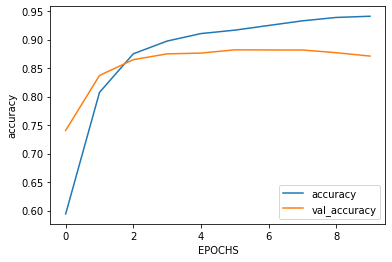

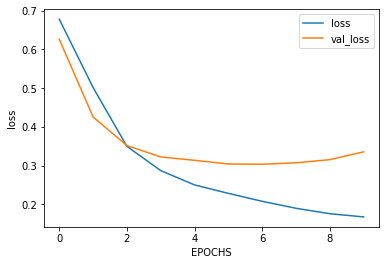

In [ ]:
plot_grpah(history,"accuracy")
plot_grpah(history, "loss")

# **LSTM on IMDB dataset [Week 3]**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
BUFFER_SIZE=10000
BATCH_SIZE=256
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", as_supervised=True, with_info=True)

train_data, test_data = imdb_subwords["train"], imdb_subwords["test"]

tokenizer_subwords = info_subwords.features["text"].encoder

train_data = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_data.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [ ]:
embedding_dims=64

lstm_model = tf.keras.Sequential([tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dims),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                                  tf.keras.layers.Dense(64, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_9 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
history = lstm_model.fit(train_dataset, epochs=10, validation_data = test_dataset)

Epoch 1/10
98/98 [==============================] - 30s 267ms/step - loss: 0.5399 - accuracy: 0.7078 - val_loss: 0.4318 - val_accuracy: 0.8180
Epoch 2/10
98/98 [==============================] - 26s 260ms/step - loss: 0.3188 - accuracy: 0.8734 - val_loss: 0.3852 - val_accuracy: 0.8464
Epoch 3/10
98/98 [==============================] - 25s 250ms/step - loss: 0.2564 - accuracy: 0.9057 - val_loss: 0.3807 - val_accuracy: 0.8469
Epoch 4/10
98/98 [==============================] - 25s 256ms/step - loss: 0.2171 - accuracy: 0.9219 - val_loss: 0.4462 - val_accuracy: 0.8505
Epoch 5/10
98/98 [==============================] - 24s 248ms/step - loss: 0.1619 - accuracy: 0.9451 - val_loss: 0.4366 - val_accuracy: 0.8493
Epoch 6/10
98/98 [==============================] - 24s 249ms/step - loss: 0.1282 - accuracy: 0.9564 - val_loss: 0.4903 - val_accuracy: 0.8330
Epoch 7/10
98/98 [==============================] - 24s 246ms/step - loss: 0.3534 - accuracy: 0.8576 - val_loss: 0.4920 - val_accuracy: 0.8279

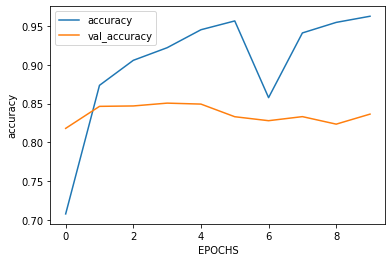

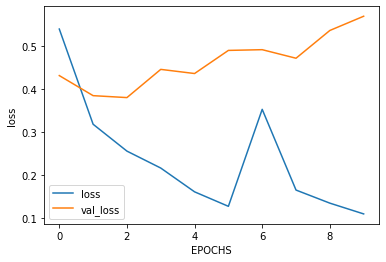

In [ ]:
plot_grpah(history,"accuracy")
plot_grpah(history, "loss")

In [ ]:
lstm_multiModel = tf.keras.Sequential([tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dims),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                  tf.keras.layers.Dense(24, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])
lstm_multiModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          261920    
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        49664     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 354,385
Trainable params: 354,385
Non-tr

In [ ]:
lstm_multiModel.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
multiModel_history = lstm_multiModel.fit(train_dataset, epochs=10, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 103s 250ms/step - loss: 0.6201 - accuracy: 0.6571 - val_loss: 0.5901 - val_accuracy: 0.6934
Epoch 2/10
391/391 [==============================] - 94s 239ms/step - loss: 0.6612 - accuracy: 0.5801 - val_loss: 0.6452 - val_accuracy: 0.6524
Epoch 3/10
391/391 [==============================] - 93s 238ms/step - loss: 0.5758 - accuracy: 0.7087 - val_loss: 0.5562 - val_accuracy: 0.7362
Epoch 4/10
391/391 [==============================] - 92s 236ms/step - loss: 0.5209 - accuracy: 0.7437 - val_loss: 0.6004 - val_accuracy: 0.7131
Epoch 5/10
391/391 [==============================] - 92s 234ms/step - loss: 0.5269 - accuracy: 0.7503 - val_loss: 0.5172 - val_accuracy: 0.7238
Epoch 6/10
391/391 [==============================] - 95s 241ms/step - loss: 0.4543 - accuracy: 0.7948 - val_loss: 0.5277 - val_accuracy: 0.7663
Epoch 7/10
391/391 [==============================] - 94s 240ms/step - loss: 0.3827 - accuracy: 0.8351 - val_loss: 0.4070 - val_a

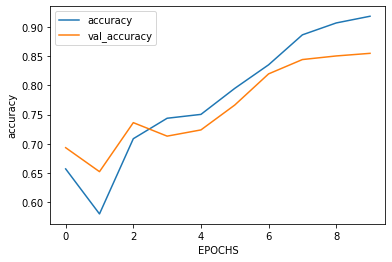

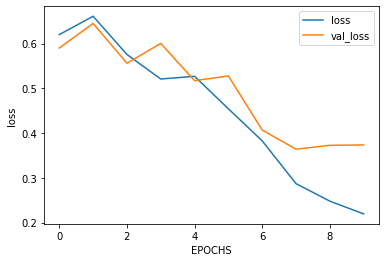

In [ ]:
plot_grpah(multiModel_history,"accuracy")
plot_grpah(multiModel_history, "loss")

In [ ]:
features= 16
batch_size=1
lstm_dim=8
timestamps = 20
import numpy as np
random_input = np.random.rand(batch_size, timestamps, features)
print(f"shape of random_input--->{random_input.shape}")

lstm_out = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim))(random_input)
print(f"lstm_out---->{lstm_out.shape}")


lstm_out_rc = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim, return_sequences=True))(random_input)
print(f"lstm_out---->{lstm_out_rc.shape}")

shape of random_input--->(1, 20, 16)
lstm_out---->(1, 16)
lstm_out---->(1, 20, 16)


In [ ]:
conv1D = tf.keras.layers.Conv1D(128, 5, activation='relu')(random_input)
print(f"lstm_out---->{conv1D.shape}")

gpd1D = tf.keras.layers.GlobalMaxPool1D()(random_input)
print(f"lstm_out---->{gpd1D.shape}")

lstm_out---->(1, 16, 128)
lstm_out---->(1, 16)


In [ ]:
conv1DModel = tf.keras.Sequential([tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dims),
                                  tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                  tf.keras.layers.GlobalMaxPool1D(),
                                  tf.keras.layers.Dense(64, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])
conv1DModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [ ]:
conv1DModel.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
multiModel_history = conv1DModel.fit(train_dataset, epochs=10, validation_data = test_dataset)

Epoch 1/10
98/98 [==============================] - 43s 419ms/step - loss: 0.6050 - accuracy: 0.6679 - val_loss: 0.3922 - val_accuracy: 0.8288
Epoch 2/10
98/98 [==============================] - 18s 183ms/step - loss: 0.2758 - accuracy: 0.8860 - val_loss: 0.2645 - val_accuracy: 0.8898
Epoch 3/10
98/98 [==============================] - 14s 140ms/step - loss: 0.1376 - accuracy: 0.9536 - val_loss: 0.2618 - val_accuracy: 0.8924
Epoch 4/10
98/98 [==============================] - 12s 125ms/step - loss: 0.0540 - accuracy: 0.9895 - val_loss: 0.2958 - val_accuracy: 0.8900
Epoch 5/10
98/98 [==============================] - 12s 119ms/step - loss: 0.0159 - accuracy: 0.9989 - val_loss: 0.3186 - val_accuracy: 0.8919
Epoch 6/10
98/98 [==============================] - 11s 108ms/step - loss: 0.0060 - accuracy: 0.9999 - val_loss: 0.3442 - val_accuracy: 0.8924
Epoch 7/10
98/98 [==============================] - 10s 102ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.3649 - val_accuracy: 0.8915

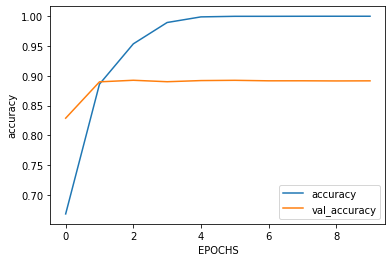

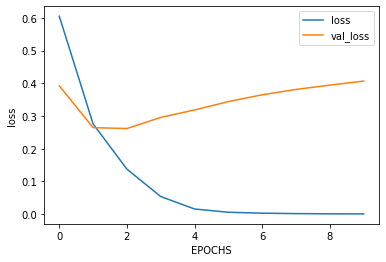

In [ ]:
plot_grpah(multiModel_history,"accuracy")
plot_grpah(multiModel_history, "loss")